In [3]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [11]:
pf_data

,PG,^GSPC
Date,,
2010-01-04,44.352673,1132.989990
2010-01-05,44.367176,1136.520020
2010-01-06,44.156742,1137.140015
2010-01-07,43.917282,1141.689941
2010-01-08,43.859211,1144.979980
...,...,...
2020-03-24,103.269997,2447.330078
2020-03-25,100.919998,2475.560059
2020-03-26,107.379997,2630.070068


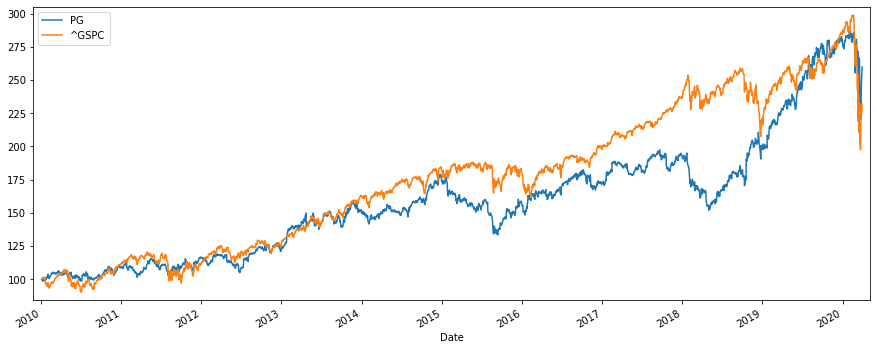

In [12]:
(pf_data / pf_data.iloc[0] *100).plot(figsize = (15,6))
plt.margins(0.01, 0.03)
plt.show()

In [17]:
log_return = np.log(pf_data / pf_data.shift(1))

In [18]:
log_return.mean() *250

PG       0.092617
^GSPC    0.081728
dtype: float64

In [20]:
cov_matrix = log_return.cov() *250
cov_matrix

,PG,^GSPC
PG,0.028507,0.017291
^GSPC,0.017291,0.029032


#### Assigning the weight of my portfolio to 1

In [33]:
num_assets = len(assets)

In [36]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.39486294, 0.60513706])

In [37]:
weights[0] + weights[1]

1.0

In [41]:
# Expected Portfolio return
np.dot(log_return.mean() * 250, weights)

0.08449791629756967

In [44]:
# Expected Portfolio variance
np.dot(weights.T, np.dot(cov_matrix, weights))

0.023247427580175985

In [45]:
np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

0.15247107128952686

In [52]:
por_return = []
por_volatility = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    por_return.append(np.dot(log_return.mean() * 250, weights))
    por_volatility.append(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
por_return, por_volatility

([0.08386229454658635,
  0.0918736343859185,
  0.07987334342637238,
  0.0868297494487866,
  0.08412154517545953,
  0.08618181576469092,
  0.08798071749328046,
  0.08237067410236881,
  0.08444464062212725,
  0.08651778278790881,
  0.080376411193155,
  0.08359468459119537,
  0.08306914587218862,
  0.08420782370255622,
  0.08342298464615217,
  0.08597553934850294,
  0.08530468750895101,
  0.0906193340544221,
  0.08601318068864915,
  0.08623266902043131,
  0.07948539817899904,
  0.08426752791102163,
  0.08842659441318619,
  0.08450586056124895,
  0.08667438939078384,
  0.08981451978716948,
  0.0860998017383442,
  0.08650550687753922,
  0.08886208641220264,
  0.08687856028208502,
  0.08885873490033605,
  0.08885520921892866,
  0.0880586448292249,
  0.08591806686299583,
  0.08293039508005987,
  0.08694345688873928,
  0.08722577191212715,
  0.08623650690533137,
  0.0823118584040232,
  0.08199298146743254,
  0.0821879743924172,
  0.08552390925258756,
  0.0903565123909235,
  0.09151229545466395

In [55]:
# it would be better if we show output as an array
por_return = []
por_volatility = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    por_return.append(np.dot(log_return.mean() * 250, weights))
    por_volatility.append(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
por_return = np.array(por_return)
por_volatility = np.array(por_volatility)

por_return, por_volatility

(array([0.08489296, 0.08895232, 0.08859857, 0.08855899, 0.07942723,
        0.08291363, 0.08426898, 0.08325045, 0.08486493, 0.08700121,
        0.09195411, 0.08878828, 0.08671039, 0.08518212, 0.08783192,
        0.08300759, 0.08366955, 0.08953537, 0.08726146, 0.08778197,
        0.09085183, 0.08620785, 0.08041561, 0.08416711, 0.0881226 ,
        0.08809506, 0.08337238, 0.08595609, 0.08752824, 0.08620775,
        0.08290832, 0.08919943, 0.08467699, 0.08424088, 0.08522817,
        0.08692751, 0.08996109, 0.08380704, 0.08681042, 0.09037733,
        0.08678475, 0.08246852, 0.0865368 , 0.08822127, 0.08123379,
        0.0877646 , 0.09163558, 0.09212082, 0.08471457, 0.09108424,
        0.08570336, 0.08789033, 0.08587715, 0.09173833, 0.08759171,
        0.08758591, 0.08403889, 0.08685271, 0.08523344, 0.08986453,
        0.09173056, 0.08565306, 0.08386536, 0.08915132, 0.08039808,
        0.08604465, 0.08574943, 0.08042182, 0.08347786, 0.08661366,
        0.08424351, 0.08432213, 0.0844266 , 0.08

In [57]:
portfolio = pd.DataFrame({'Return': por_return, 'Volatility': por_volatility})
portfolio

,Return,Volatility
0,0.084893,0.023108
1,0.088952,0.024147
2,0.088599,0.023877
3,0.088559,0.023849
4,0.079427,0.028833
...,...,...
995,0.083674,0.023676
996,0.092136,0.028116
997,0.084206,0.023378
998,0.082639,0.024478


Text(0, 0.5, 'Expected Return')

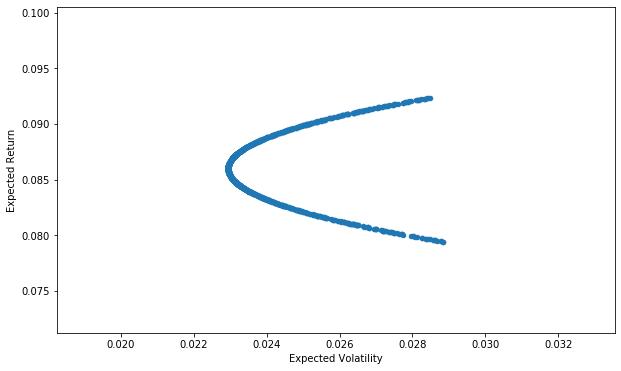

In [67]:
portfolio.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,6))
plt.xlabel('Expected Volatility')
plt.ylabel("Expected Return")

In [18]:
a = pd.DataFrame([0.05, 0.02], index = pf_data.columns, columns = ['allocation'])
a.allocation

PG       0.05
^GSPC    0.02
Name: allocation, dtype: float64

In [22]:
[round(i*100, 2)for i in a.allocation]

[5.0, 2.0]

In [21]:
b = []

for i in a.allocation:
    b.append(round(i*100,2))
    
print(b)

[5.0, 2.0]
